# Machine Learning in Stroke survival 
(ONLY for technique demo)

# Include libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sksurv.column import encode_categorical

# Data Preprocessing

In [2]:
data = pd.read_csv(os.path.join('..', '..', 'data', 'tidy_Stroke_Vital_Sign.csv'))
data_x = data.drop(['UID', 'Hospital_ID', 'SurvivalWeeks', 'admission_date',
                    'discharge_date', 'death_date', 'Mortality', 'CVDeath'], axis=1)
categorical_ix = [0, 2, 3, 4, 5, 6, 7, 8, 15, 16, 17]
categorical_columns = data_x.columns[categorical_ix].values
data_x_one_hot = encode_categorical(data_x, columns=categorical_columns)

data_y = data[['Mortality', 'SurvivalWeeks']]
data_y.loc[:, 'Mortality'] = data_y['Mortality'].astype(bool)

data_y = np.array(list(data_y.to_records(index=False)))

X_train, X_test, y_train, y_test = train_test_split(data_x_one_hot, data_y, test_size=0.25, random_state=369)

C:\Users\USER\anaconda3\envs\stroke_vitalsing\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [3]:
data_x_one_hot

,Sex=1.0,Age,AF=1.0,DM=1.0,HTN=1.0,Hyperlipidemia=1.0,CHF=1.0,Smoking=1.0,Cancer before adm=1.0,ALT,...,DBP SD,DBPSD G,DBP CV,DBPCV G,Mean RR,MeanRR G,RR SD,RRSD G,RR CV,RRCV G
0,1.0,62.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,21.0,...,7.148569,2.0,0.094773,3.0,16.285714,2.0,1.277753,2.0,0.078459,2.0
1,1.0,81.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,17.0,...,8.436824,3.0,0.096783,3.0,16.500000,2.0,2.416556,3.0,0.146458,4.0
2,0.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,42.0,...,7.442819,2.0,0.070839,2.0,17.454545,3.0,1.304791,2.0,0.074754,2.0
3,1.0,82.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,36.0,...,7.336774,2.0,0.098515,3.0,18.333333,4.0,0.623610,1.0,0.034015,1.0
4,1.0,89.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.0,...,12.493529,4.0,0.162173,5.0,17.848101,3.0,3.186556,4.0,0.178538,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13618,1.0,67.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,9.0,...,7.699696,2.0,0.121507,4.0,17.166667,3.0,0.897527,1.0,0.052283,2.0
13619,0.0,65.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,40.0,...,5.479479,2.0,0.066373,2.0,16.875000,2.0,1.615356,2.0,0.095725,3.0
13620,1.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,...,8.242421,3.0,0.085193,3.0,15.923077,1.0,2.200054,3.0,0.138168,4.0
13621,0.0,79.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,...,6.344046,2.0,0.080759,3.0,17.166667,3.0,0.849837,1.0,0.049505,2.0


In [4]:
X_test

,Sex=1.0,Age,AF=1.0,DM=1.0,HTN=1.0,Hyperlipidemia=1.0,CHF=1.0,Smoking=1.0,Cancer before adm=1.0,ALT,...,DBP SD,DBPSD G,DBP CV,DBPCV G,Mean RR,MeanRR G,RR SD,RRSD G,RR CV,RRCV G
1887,0.0,89.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,40.0,...,13.077736,4.0,0.212245,5.0,21.623529,5.0,2.439752,3.0,0.112829,3.0
345,0.0,73.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,...,12.228652,4.0,0.174591,5.0,17.317073,3.0,1.673889,2.0,0.096661,3.0
13159,0.0,55.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,67.0,...,13.812200,4.0,0.178536,5.0,16.600000,2.0,1.854724,2.0,0.111730,3.0
8240,0.0,78.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,...,9.073527,3.0,0.100892,3.0,19.300000,5.0,1.100000,2.0,0.056995,2.0
6738,1.0,77.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,74.0,...,6.093348,2.0,0.069453,2.0,17.700000,3.0,1.187434,2.0,0.067087,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,1.0,61.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,40.0,...,12.107649,4.0,0.114669,3.0,17.250000,3.0,1.299038,2.0,0.075307,2.0
335,1.0,69.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,...,9.131690,3.0,0.106714,3.0,17.000000,3.0,1.309307,2.0,0.077018,2.0
2544,1.0,45.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,30.0,...,10.400842,3.0,0.098335,3.0,17.628571,3.0,0.958741,1.0,0.054386,2.0
4074,1.0,63.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,13.0,...,8.240736,3.0,0.094812,3.0,17.272727,3.0,1.212879,2.0,0.070219,2.0


In [5]:
demo_x = X_test.sort_values(by=['Age'])
demo_x = pd.concat([demo_x.head(3),
                    demo_x.tail(3)])
demo_x

,Sex=1.0,Age,AF=1.0,DM=1.0,HTN=1.0,Hyperlipidemia=1.0,CHF=1.0,Smoking=1.0,Cancer before adm=1.0,ALT,...,DBP SD,DBPSD G,DBP CV,DBPCV G,Mean RR,MeanRR G,RR SD,RRSD G,RR CV,RRCV G
9164,1.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,...,8.676938,3.0,0.113088,3.0,17.363636,3.0,0.642824,1.0,0.037021,1.0
10008,0.0,20.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,276.0,...,5.314132,2.0,0.059442,2.0,17.200000,3.0,1.249000,2.0,0.072616,2.0
679,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,...,8.339725,3.0,0.100652,3.0,16.571429,2.0,2.321154,3.0,0.140070,4.0
10916,1.0,99.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,...,6.858465,2.0,0.082870,3.0,19.200000,5.0,1.886796,2.0,0.098271,3.0
10299,0.0,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.0,...,8.885870,3.0,0.119055,3.0,18.111111,4.0,1.662959,2.0,0.091820,3.0
10218,0.0,101.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,12.284689,4.0,0.174388,5.0,18.444444,4.0,1.257079,2.0,0.068155,2.0


 # Kaplan-Meier method

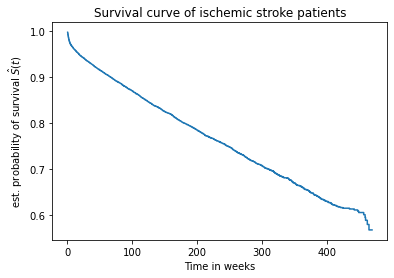

In [6]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y['Mortality'], data_y['SurvivalWeeks'])
plt.title('Survival curve of ischemic stroke patients')
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("Time in weeks")
plt.show()

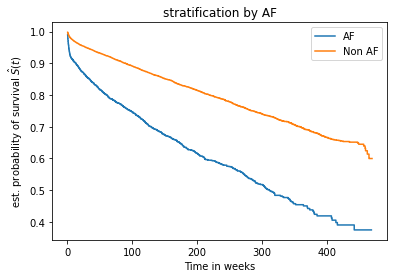

In [7]:
data_af = data_y[data_x.AF == 1]
data_non_af = data_y[data_x.AF == 0]
plt.title('stratification by AF')

af_time, af_survival_prob = kaplan_meier_estimator(data_af['Mortality'], data_af['SurvivalWeeks'])
plt.step(af_time, af_survival_prob, where="post", label="AF")
non_af_time, non_af_survival_prob = kaplan_meier_estimator(data_non_af['Mortality'], data_non_af['SurvivalWeeks'])
plt.step(non_af_time, non_af_survival_prob, where="post", label="Non AF")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("Time in weeks")
plt.legend(loc="best")
plt.show()

# Random Survival Forests

## RSF performance (c-index)

In [8]:
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=369)

rsf.fit(X_train, y_train)

print('C-index = %.3f' %(rsf.score(X_test, y_test)))

C-index = 0.806


## RSF- Predict survival function

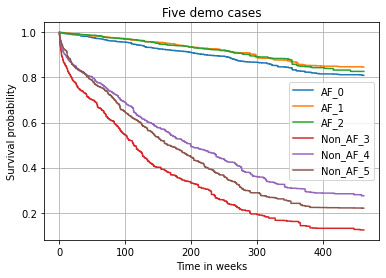

In [9]:
surv = rsf.predict_survival_function(demo_x, return_array=True)

for i, s in enumerate(surv):
    if i < 3:
        plt.step(rsf.event_times_, s, where="post", label='AF_'+str(i))
    else:
        plt.step(rsf.event_times_, s, where="post", label='Non_AF_'+str(i))
plt.title('Five demo cases')
plt.ylabel("Survival probability")
plt.xlabel("Time in weeks")
plt.legend()
plt.grid(True)

## RSF- Predicted cumulative hazard function

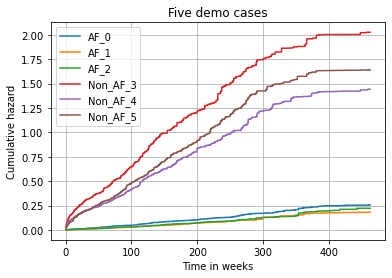

In [10]:
surv = rsf.predict_cumulative_hazard_function(demo_x, return_array=True)

for i, s in enumerate(surv):
    if i < 3:
        plt.step(rsf.event_times_, s, where="post", label='AF_'+str(i))
    else:
        plt.step(rsf.event_times_, s, where="post", label='Non_AF_'+str(i))
plt.title('Five demo cases')
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in weeks")
plt.legend()
plt.grid(True)

## RSF- Predicted risk scores

In [11]:
pd.Series(rsf.predict(demo_x))

0     111.931140
1      73.505862
2      77.208507
3    1259.827747
4     840.432643
5     957.161331
dtype: float64

## RSF- Permutation-based Feature Importance

In [12]:
import eli5
from eli5.sklearn import PermutationImportance
feature_names = data_x_one_hot.columns.values
perm = PermutationImportance(rsf, n_iter=15, random_state=369)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.0414 ± 0.0073,Age
0.0162 ± 0.0023,Cancer before adm=1.0
0.0083 ± 0.0048,V
0.0073 ± 0.0037,MPsum
0.0072 ± 0.0024,NG=1.0
0.0050 ± 0.0025,Mean HR
0.0048 ± 0.0021,CHOL
0.0046 ± 0.0018,ALT
0.0034 ± 0.0016,Foley=1.0
0.0026 ± 0.0030,M


# Gradient Boosted Models
While a Random Survival Forest fits a set of Survival Trees independently and then averages their predictions, a gradient boosted model is constructed sequentially in a greedy stagewise fashion.

## Gradient boosting with regression tree base learner

In [13]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

est_cph_tree = GradientBoostingSurvivalAnalysis(
    n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0
)

est_cph_tree.fit(X_train, y_train)

print('C-index = %.3f' %est_cph_tree.score(X_test, y_test))

C-index = 0.809


## Gradient boosting with component-wise least squares base learner

In [14]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis

est_cph_ls = ComponentwiseGradientBoostingSurvivalAnalysis(
    n_estimators=100, learning_rate=1.0, random_state=0
)

est_cph_ls.fit(X_train, y_train)

print('C-index = %.3f' %est_cph_ls.score(X_test, y_test))

C-index = 0.784


In [15]:
coef = pd.Series(est_cph_ls.coef_, ["Intercept"] + data_x_one_hot.columns.tolist())

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 11


NG=1.0                   0.961946
Cancer before adm=1.0    0.852906
Foley=1.0                0.456165
AF=1.0                   0.355294
Hyperlipidemia=1.0      -0.344887
CHF=1.0                  0.165050
ICU=1.0                  0.109270
MeanHR G                 0.106922
DM=1.0                   0.054483
Age                      0.016088
MPsum                   -0.006751
dtype: float64

# Survival Support Vector Machine

## As a ranking problem
The model learns to assign samples with shorter survival times a lower rank by considering all possible pairs of samples in the training data.

In [16]:
from sksurv.svm import FastSurvivalSVM

fsSVM = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=0)
fsSVM.fit(X_train, y_train)

print('C-index = %.3f' %fsSVM.score(X_test, y_test))

C-index = 0.811


## As a regression problem

In [17]:
y_log_t = y_train.copy()
y_log_t["SurvivalWeeks"] = np.log1p(y_train["SurvivalWeeks"])
y_log_t

array([(False, 4.64026151), (False, 5.91079664), (False, 5.312502  ), ...,
       ( True, 1.09861229), (False, 5.03323513), (False, 5.65748919)],
      dtype=(numpy.record, [('Mortality', '?'), ('SurvivalWeeks', '<f8')]))

In [18]:
from sksurv.metrics import concordance_index_censored
ref_estimator = FastSurvivalSVM(rank_ratio=0.0, max_iter=1000, tol=1e-5, random_state=0)
ref_estimator.fit(X_train, y_log_t)

cindex = concordance_index_censored(
    y_train['Mortality'],
    y_train['SurvivalWeeks'],
    -ref_estimator.predict(X_train),  # flip sign to obtain risk scores
)
print(cindex[0])

0.5662700297320988
